# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
# imports
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D


Using TensorFlow backend.


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# printing  train & test data samples
print("train data sample :", X_train[35])
print("test data sample :", X_test[35])
print("train label sample :", y_train[35])
print("test label sample :", y_test[35])

train data sample : [[[251 249 250]
  [247 245 247]
  [247 245 247]
  ...
  [229 190 146]
  [244 231 224]
  [251 241 241]]

 [[249 248 248]
  [246 244 244]
  [246 245 244]
  ...
  [233 188 141]
  [249 237 233]
  [252 242 241]]

 [[167 165 148]
  [167 164 148]
  [167 164 149]
  ...
  [217 182 139]
  [217 211 203]
  [220 213 208]]

 ...

 [[133 130  39]
  [123 127  36]
  [124 130  35]
  ...
  [118 125  30]
  [114 122  26]
  [115 125  27]]

 [[123 125  36]
  [124 127  36]
  [126 129  32]
  ...
  [112 122  26]
  [108 119  27]
  [104 119  22]]

 [[125 128  42]
  [129 132  43]
  [126 130  36]
  ...
  [118 128  35]
  [112 122  33]
  [105 121  26]]]
test data sample : [[[ 66  73  84]
  [ 66  71  81]
  [ 64  67  75]
  ...
  [104  97  81]
  [104  97  81]
  [104  97  81]]

 [[ 51  57  67]
  [ 55  59  68]
  [ 49  51  58]
  ...
  [ 94  87  71]
  [ 95  88  72]
  [ 96  89  73]]

 [[ 49  53  63]
  [ 55  58  67]
  [ 48  49  55]
  ...
  [ 78  69  55]
  [ 77  68  54]
  [ 78  69  56]]

 ...

 [[153 156 13

Label: [4]


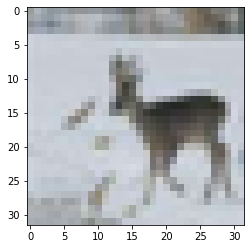

In [4]:
#visualising data
print("Label: {}".format(y_train[20]))
plt.imshow(X_train[20])

In [5]:
# Splitting data set into 2 categories one with 0-4 labels & other with 5-9 labels.

x_train_zero_four = []
y_train_zero_four = []
x_train_five_nine = []
y_train_five_nine = []

x_test_zero_four = []
y_test_zero_four = []
x_test_five_nine = []
y_test_five_nine = []

for idx,x in enumerate(y_train):
    if (x>4):
        x_train_five_nine.append(X_train[idx])
        y_train_five_nine.append(y_train[idx])
    else:
        x_train_zero_four.append(X_train[idx])
        y_train_zero_four.append(y_train[idx])

        
for idx,y in enumerate(y_test):
    if (y>4):
        x_test_five_nine.append(X_test[idx])
        y_test_five_nine.append(y_test[idx])
    else:
        x_test_zero_four.append(X_test[idx])
        y_test_zero_four.append(y_test[idx])
        
print(y_train_five_nine[14])
print(y_train_zero_four[14]) 

print(y_test_five_nine[14])
print(y_test_zero_four[14]) 

[5]
[0]
[7]
[1]


In [6]:
# printing shape of each data set post splitting

x_train_zero_four = np.asarray(x_train_zero_four,dtype='float')
y_train_zero_four = np.asarray(y_train_zero_four,dtype='float')
x_train_five_nine = np.asarray(x_train_five_nine,dtype='float')
y_train_five_nine = np.asarray(y_train_five_nine,dtype='float')
x_test_zero_four = np.asarray(x_test_zero_four,dtype='float')
y_test_zero_four = np.asarray(y_test_zero_four,dtype='float')
x_test_five_nine = np.asarray(x_test_five_nine,dtype='float')
y_test_five_nine = np.asarray(y_test_five_nine,dtype='float')
print(x_train_zero_four.shape)
print(y_train_zero_four.shape)
print(x_train_five_nine.shape)
print(y_train_five_nine.shape)
print(x_test_zero_four.shape)
print(y_test_zero_four.shape)
print(x_test_five_nine.shape)
print(y_test_five_nine.shape)

(25000, 32, 32, 3)
(25000, 1)
(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)
(5000, 32, 32, 3)
(5000, 1)


In [7]:
#Reshaping data

x_train_zero_four = x_train_zero_four.reshape(x_train_zero_four.shape[0], 32, 32, 3).astype('float32')
x_test_zero_four = x_test_zero_four.reshape(x_test_zero_four.shape[0], 32, 32, 3).astype('float32')

In [8]:
#Normalise data

x_train_zero_four /= 255
x_test_zero_four /= 255

In [9]:
print(x_train_zero_four.shape)
print(y_test_zero_four.shape)

(25000, 32, 32, 3)
(5000, 1)


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [10]:
y_train_zero_four = np_utils.to_categorical(y_train_zero_four, 5)
y_test_zero_four = np_utils.to_categorical(y_test_zero_four, 5)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [11]:
model = tf.keras.models.Sequential()
 # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

 # Dropout
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Dense
model.add(Dense(128))
model.add(Activation('relu'))

# More Dropout
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_zero_four, y_train_zero_four, batch_size=32, epochs=20,validation_data=(x_test_zero_four, y_test_zero_four))

Train on 25000 samples, validate on 5000 samples
Epoch 1/20
25000/25000 [==============================] - 15s 607us/sample - loss: 1.1467 - accuracy: 0.5277 - val_loss: 0.9362 - val_accuracy: 0.6268
Epoch 2/20
25000/25000 [==============================] - 12s 479us/sample - loss: 0.9464 - accuracy: 0.6282 - val_loss: 0.8385 - val_accuracy: 0.6622
Epoch 3/20
25000/25000 [==============================] - 12s 473us/sample - loss: 0.8810 - accuracy: 0.6566 - val_loss: 0.8046 - val_accuracy: 0.6928
Epoch 4/20
25000/25000 [==============================] - 12s 488us/sample - loss: 0.8331 - accuracy: 0.6793 - val_loss: 0.7743 - val_accuracy: 0.6924
Epoch 5/20
25000/25000 [==============================] - 12s 499us/sample - loss: 0.7928 - accuracy: 0.6964 - val_loss: 0.7555 - val_accuracy: 0.7072
Epoch 6/20
25000/25000 [==============================] - 12s 488us/sample - loss: 0.7548 - accuracy: 0.7101 - val_loss: 0.7798 - val_accuracy: 0.7008
Epoch 7/20
25000/25000 [=====================

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [12]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv2d
False
activation
False
max_pooling2d
False
dropout
False
flatten
False
dense
True
activation_1
False
dropout_1
False
dense_1
True
activation_2
False
dropout_2
False
dense_2
True
activation_3
False


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [13]:
#Reshape
x_train_five_nine = x_train_five_nine.reshape(x_train_five_nine.shape[0], 32, 32, 3).astype('float32')
x_test_five_nine = x_test_five_nine.reshape(x_test_five_nine.shape[0], 32, 32, 3).astype('float32')

In [14]:
#Normalise
x_train_five_nine /= 255
x_test_five_nine /= 255

In [15]:
# encoding the labels for 5-9 of cifar 10 data set
y_train_five_nine = y_train_five_nine -5
y_test_five_nine = y_test_five_nine - 5

print(y_test_five_nine[0])

y_train_five_nine = np_utils.to_categorical(y_train_five_nine, 5)
y_test_five_nine = np_utils.to_categorical(y_test_five_nine, 5)

[3.]


In [16]:
#Transfer learning . Fit the model built on 0-4 data onto data 5-9
model.fit(x_train_five_nine, y_train_five_nine, batch_size=32, epochs=20,validation_data=(x_test_five_nine, y_test_five_nine))

Train on 25000 samples, validate on 5000 samples
Epoch 1/20
25000/25000 [==============================] - 12s 492us/sample - loss: 1.1143 - accuracy: 0.5708 - val_loss: 0.7653 - val_accuracy: 0.7228
Epoch 2/20
25000/25000 [==============================] - 12s 483us/sample - loss: 0.8237 - accuracy: 0.6911 - val_loss: 0.6673 - val_accuracy: 0.7540
Epoch 3/20
25000/25000 [==============================] - 12s 491us/sample - loss: 0.7484 - accuracy: 0.7242 - val_loss: 0.6195 - val_accuracy: 0.7698
Epoch 4/20
25000/25000 [==============================] - 13s 512us/sample - loss: 0.6867 - accuracy: 0.7507 - val_loss: 0.6017 - val_accuracy: 0.7784
Epoch 5/20
25000/25000 [==============================] - 13s 508us/sample - loss: 0.6444 - accuracy: 0.7638 - val_loss: 0.5550 - val_accuracy: 0.8000
Epoch 6/20
25000/25000 [==============================] - 13s 509us/sample - loss: 0.6086 - accuracy: 0.7792 - val_loss: 0.5609 - val_accuracy: 0.7882
Epoch 7/20
25000/25000 [=====================

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [17]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [18]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [19]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_train.data[:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 8. Test data

In [20]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
twenty_test.data[:3]

["From: brian@ucsd.edu (Brian Kantor)\nSubject: Re: HELP for Kidney Stones ..............\nOrganization: The Avant-Garde of the Now, Ltd.\nLines: 12\nNNTP-Posting-Host: ucsd.edu\n\nAs I recall from my bout with kidney stones, there isn't any\nmedication that can do anything about them except relieve the pain.\n\nEither they pass, or they have to be broken up with sound, or they have\nto be extracted surgically.\n\nWhen I was in, the X-ray tech happened to mention that she'd had kidney\nstones and children, and the childbirth hurt less.\n\nDemerol worked, although I nearly got arrested on my way home when I barfed\nall over the police car parked just outside the ER.\n\t- Brian\n",
 'From: rind@enterprise.bih.harvard.edu (David Rind)\nSubject: Re: Candida(yeast) Bloom, Fact or Fiction\nOrganization: Beth Israel Hospital, Harvard Medical School, Boston Mass., USA\nLines: 37\nNNTP-Posting-Host: enterprise.bih.harvard.edu\n\nIn article <1993Apr26.103242.1@vms.ocom.okstate.edu>\n banschbach@

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [21]:
print("shape of train set labels",twenty_train.target.shape)
print("shape of train set features",len(twenty_train.data))

shape of train set labels (2257,)
shape of train set features 2257


In [22]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [23]:

vectorizer = TfidfVectorizer(min_df = 4,ngram_range = (1,2),stop_words = "english")
X_train = vectorizer.fit_transform(twenty_train.data)
X_test = vectorizer.transform(twenty_test.data)

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [24]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression()
LRmodel.fit(X_train,twenty_train.target)
LR_score_train = LRmodel.score(X_train,twenty_train.target)
print("training score",LR_score_train)
LR_score_test = LRmodel.score(X_test,twenty_test.target)
print("test score",LR_score_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


training score 0.9920248116969429
test score 0.9027962716378163
